In [46]:
import pandas as pd
from pandapower.timeseries.run_time_series import run_timeseries
import matplotlib
matplotlib.rcParams['timezone'] = 'Europe/Berlin'

import data_process_base
import importlib
importlib.reload(data_process_base)

try:
    import seaborn
    colors = seaborn.color_palette()
except:
    colors = ["b", "g", "r", "c", "y"]

In [47]:
# create random time series from import data
da = data_process_base.DataAction()
nc = data_process_base.net_calc()

da.folder_path = r"G:\\My Drive\\docs\\Education\\University\\ALUF\\SSE\\6 sem\\Bachelor Thesis\\data\\"
keep_cols = ['DE_KN_residential1_grid_import',
             'DE_KN_residential2_grid_import',
             'utc_timestamp']
da.imp_procc("house_data.csv", keep_cols)

Number of data frame segments =  90
dfList created successfully.


In [48]:
def end_results(sgen_val, iter):
    """Final boss"""
    
    # create df to store output
    col_names = ['line_1', 'line_2', 'line_3', 'line_4', 'line_5', 'line_6', 'line_7', 'line_8']
    end_vals = pd.DataFrame(columns=col_names)
    end_times = pd.DataFrame(dtype='str', columns=col_names)

    for i in range(0, iter):
        # iterative scramble
        night_merge = da.power_merge()

        # assign generator value at random times
        # night_mw = da.sgen_comm(ts=night_merge, wind_length=60, sgen_val=sgen_val, parties=4)
        night_mw = da.sgen_rand(ts=night_merge, sgen_val=sgen_val)
        da.night_mw = night_mw

        nc.four_loads_branched_make(night_mw)
        nc.four_loads_branched_out("res_line", "loading_percent")
        nc.four_loads_branched_run()
        nc.four_loads_branched_read_loadpct()

        nc.end_vals_step(nc.ll, end_vals)
        nc.end_times_step(nc.ll, end_times)

    return end_vals, end_times


iter = 1
sgen_val = 0.01 # typical val: 0.010 MW = 10kW
end_vals, end_times = end_results(sgen_val, iter)

100%|██████████| 601/601 [00:01<00:00, 345.44it/s]


In [49]:
end_vals

,line_1,line_2,line_3,line_4,line_5,line_6,line_7,line_8
0,58.920922,47.992385,44.216298,12.642052,24.623065,10.977961,37.419445,12.642239


In [50]:
def line_overloads(end_vals, threshold):
    # count the number of overloads on each line
    return end_vals[end_vals > threshold].count()


threshold = 40
overloads = line_overloads(end_vals, threshold)
print("For", iter, "cases, the line overload occurance was: ")
overloads/iter

For 1 cases, the line overload occurance was: 


line_1    1.0
line_2    1.0
line_3    1.0
line_4    0.0
line_5    0.0
line_6    0.0
line_7    0.0
line_8    0.0
dtype: float64

In [51]:
end_times

,line_1,line_2,line_3,line_4,line_5,line_6,line_7,line_8
0,19:49:00,19:49:00,19:49:00,20:07:00,19:06:00,19:06:00,19:49:00,20:07:00


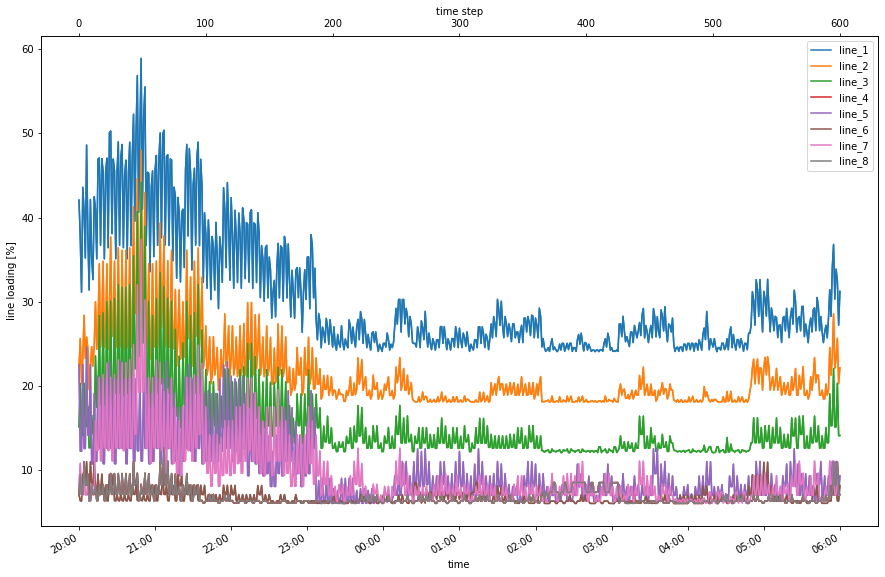

In [52]:
nc.four_loads_branched_plot_linepct()

100%|██████████| 2/2 [00:00<00:00, 46.47it/s]


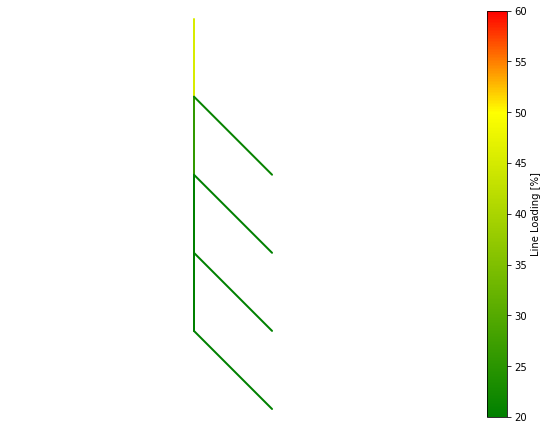

In [53]:
nc.load_graph(nc.net, time_step=30)

In [54]:
from datetime import date
import math

f_date = date(2015, 5, 21)
l_date = date(2016, 11, 27)
delta = l_date - f_date
print("Total days in dfList:", delta.days)

foo = da.parse_procc(da.dfList[0])
bar = len(da.unique_date(foo))-3
foobar = bar*89
print("Unique parsable days for simulation:", foobar)

k = 4
n = foobar
ways = math.pow(n, k) # draw k samples from a set of n elements: n^k
print("Ordered sampling with replacement combinations:", ways)

Total days in dfList: 556
Unique parsable days for simulation: 445
Ordered sampling with replacement combinations: 39213900625.0
